In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import qgrid

In [2]:
count = 0
files = []
for r, d, f in os.walk(os.path.join(os.getcwd(),"data")):
    for file in f:
        if "dataManipulation" in file or 'checkpoint' in file:
            continue
        if '.csv'  in file:
            files.append(os.path.join(r, file))
            count += 1
print('Total Files',count)

Total Files 126


In [3]:
dataQ = []
for f in files:
    ques = pd.read_csv(f)
    ques = ques[ques['poorSignal']==0]
    ques = ques.drop(['poorSignal','rawValue','delta','theta','meditation',],axis=1)
    if ques.shape[0] != 0:
        if '_t_' in f:
            ques['isTrue'] = [1 for i in range(ques.shape[0])]
        elif '_f_' in f:
            ques['isTrue'] = [0 for i in range(ques.shape[0])]
        dataQ.append(ques)

In [4]:
import math

In [5]:
avgRow = math.ceil(sum([q.shape[0] for q in dataQ])/len(dataQ))
avgRow

35

In [6]:
from scipy import signal

In [7]:
def resample(data):
    sampledData = pd.DataFrame()
    u = math.ceil(((avgRow/len(data))*100)+0.001)
    for column in data.columns:
        if column == "isTrue":
            t = int(data[column][:1])
            sampledData[column] = [t for i in range(avgRow+1)]
            continue
        sampledData[column] = signal.resample_poly(data[column],u,100)
    return sampledData

In [8]:
sampledDataQ = []
for data in dataQ:
    data = resample(data)
    sampledDataQ.append(data)

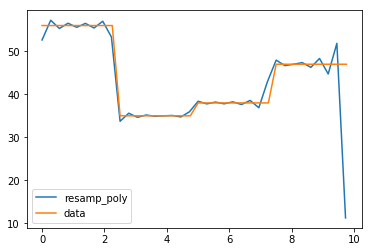

In [27]:
x = np.linspace(0, 10, 40, endpoint=False)
xnew = np.linspace(0, 10, 36, endpoint=False)
plt.plot(xnew,sampledDataQ[1]["attention"] )
plt.plot(x, dataQ[1]["attention"] )
plt.legend(['resamp_poly', 'data'], loc='best')
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
std = StandardScaler()

In [10]:
scaleCol = ['attention','highAlpha','highBeta','lowAlpha','lowBeta','lowGamma','midGamma']
finalDataQ = []
# for data in sampledDataQ:
#     data[scaleCol] = scaler.fit_transform(data[scaleCol])
#     data[scaleCol] = std.fit_transform(data[scaleCol])
#     finalDataQ.append(data)

In [11]:
dataset = pd.concat(sampledDataQ,ignore_index=True)
dataset.describe()

,highAlpha,lowAlpha,highBeta,lowBeta,midGamma,lowGamma,attention,isTrue
count,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000
mean,31365.576853,38658.759763,22618.404378,32155.815802,5173.962215,10575.434361,36.887718,0.520325
std,48070.047505,51610.095285,36251.061974,59805.277435,16524.347899,19424.086294,25.978549,0.499643
min,-40053.363166,-19700.747620,-23453.347401,-50933.595817,-13029.755032,-4602.294778,-9.816589,0.000000
25%,6463.358341,8986.968372,4811.351583,6339.361493,925.405819,2183.022330,14.690395,0.000000
50%,17464.141796,20231.351467,10635.765846,13708.875025,2221.828515,4811.046797,38.533971,1.000000
75%,36830.291058,50217.446504,23902.948955,31805.383528,4765.408051,12440.616539,54.403076,1.000000
max,458757.196955,412208.413955,398066.304657,718288.552101,196010.785413,201665.008664,109.205700,1.000000


In [14]:
dataset[scaleCol] = scaler.fit_transform(dataset[scaleCol])
dataset.groupby('isTrue').describe().stack()

attention    highAlpha     highBeta     lowAlpha      lowBeta  \
isTrue                                                                          
0      count  2124.000000  2124.000000  2124.000000  2124.000000  2124.000000   
       mean      0.420988     0.142841     0.104439     0.133550     0.104998   
       std       0.207672     0.104919     0.081716     0.100524     0.082989   
       min       0.011546     0.052428     0.008011     0.000199     0.000000   
       25%       0.298499     0.093010     0.067387     0.066966     0.074562   
       50%       0.427378     0.113187     0.081234     0.098270     0.082805   
       75%       0.549279     0.150236     0.106961     0.170093     0.103352   
       max       1.000000     1.000000     1.000000     0.852923     1.000000   
1      count  2304.000000  2304.000000  2304.000000  2304.000000  2304.000000   
       mean      0.366045     0.143489     0.113780     0.136567     0.110801   
       std       0.224437     0.087775     0.089554     0.134639     0.072488   
       min       0.000000     0.000000     0.000000     0.000000     0.034503   
       25%       0.109360     0.093464     0.066566     0.065782     0.074216   
       50%       0.378602     0.116097     0.079652     0.088381     0.085561   
       75%       0.531095     0.156578     0.118606     0.149152     0.112186   
       max       0.954228     0.850705     0.679005     1.000000     0.740329   

                 lowGamma     midGamma  
isTrue                                  
0      count  2124.000000  2124.000000  
       mean      0.067377     0.081279  
       std       0.066725     0.046617  
       min       0.000000     0.000000  
       25%       0.033525     0.067258  
       50%       0.047221     0.073503  
       75%       0.077400     0.084285  
       max       0.821104     0.862698  
1      count  2304.000000  2304.000000  
       mean      0.079304     0.092432  
       std       0.113464     0.099743  
       min       0.005831     0.052158  
       25%       0.032257     0.066129  
       50%       0.043881     0.072309  
       75%       0.086797     0.085939  
       max       1.000000     1.000000

In [15]:
dataset.to_csv("DatasetWithScale.csv")

In [22]:
c = []
for col in scaleCol:
    for i in range(1,avgRow+2):
        c.append(f"{col}{i}")
c.insert(0,"isTrue")

In [31]:
datasetQ = []
for data in finalDataQ:
    finalQues = data.groupby('isTrue')[scaleCol].apply(lambda x: pd.DataFrame(x.values)).unstack().reset_index()
    finalQues.columns = finalQues.columns.droplevel()
    finalQues.columns = c
    datasetQ.append(finalQues)
print(finalDataQ[30]["lowBeta"])
dataset = pd.concat(datasetQ,ignore_index=True,)

0     0.507155
1     0.510588
2     0.504639
3     0.505381
4     0.516906
5     0.472229
6     0.900221
7     1.000000
8     0.949968
9     0.981884
10    0.960695
11    0.973902
12    0.966715
13    0.968073
14    0.974145
15    0.941536
16    0.914647
17    0.921703
18    0.921162
19    0.916212
20    0.927285
21    0.908565
22    0.937603
23    0.893173
24    0.966424
25    0.799347
26    0.359042
27    0.444849
28    0.402731
29    0.428513
30    0.410620
31    0.424770
32    0.412634
33    0.423670
34    0.415668
35    0.000000
Name: lowBeta, dtype: float64


In [28]:
dataset.to_csv("singleRowDataset.csv")